In [20]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [21]:
y_train_label=np.loadtxt('label.txt',delimiter=",")
x_Train=np.loadtxt('feature.txt',delimiter=",")

In [22]:
y_test_label=np.loadtxt('test_label.txt',delimiter=",")
x_Test=np.loadtxt('test_feature.txt',delimiter=",")

In [23]:
x_Train4D=x_Train.reshape(252,11,91,1).astype('float32')
x_Test4D=x_Test.reshape(252,11,91,1).astype('float32')

In [43]:
x_Train4D.max()

587293.0

In [80]:
x_Train4D_normalize=[]
for i in x_Train4D:
    new_i = i/i.max()
    x_Train4D_normalize.append(new_i)
x_Train4D_normalize=np.array(x_Train4D_normalize)

In [81]:
x_Test4D_normalize=[]
for i in x_Test4D:
    new_i = i/i.max()
    x_Test4D_normalize.append(new_i)
x_Test4D_normalize=np.array(x_Test4D_normalize)

In [29]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [86]:
x_Test4D_normalize.shape


(252, 11, 91, 1)

In [87]:
y_Train_OneHot.shape

(252, 2)

In [103]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [104]:
model = Sequential()

In [105]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(11,91,1), 
                 activation='relu'))

In [106]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [107]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [108]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [109]:
model.add(Dropout(0.25))

In [110]:
model.add(Flatten())

In [111]:
model.add(Dense(128, activation='relu'))

In [112]:
model.add(Dropout(0.5))

In [117]:
model.add(Dense(2,activation='softmax'))

In [118]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 11, 91, 16)        416       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 45, 16)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 45, 36)         14436     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 22, 36)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 22, 36)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1584)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [119]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [120]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=20, batch_size=30,verbose=2)

Epoch 1/20
7/7 - 1s - loss: 0.5422 - accuracy: 0.8756 - val_loss: 1.0343 - val_accuracy: 0.1569
Epoch 2/20
7/7 - 1s - loss: 0.3518 - accuracy: 1.0000 - val_loss: 1.0905 - val_accuracy: 0.1569
Epoch 3/20
7/7 - 1s - loss: 0.3429 - accuracy: 1.0000 - val_loss: 1.1058 - val_accuracy: 0.1569
Epoch 4/20
7/7 - 1s - loss: 0.3349 - accuracy: 1.0000 - val_loss: 1.1211 - val_accuracy: 0.1569
Epoch 5/20
7/7 - 1s - loss: 0.3272 - accuracy: 1.0000 - val_loss: 1.1365 - val_accuracy: 0.1569
Epoch 6/20
7/7 - 1s - loss: 0.3197 - accuracy: 1.0000 - val_loss: 1.1520 - val_accuracy: 0.1569
Epoch 7/20
7/7 - 1s - loss: 0.3124 - accuracy: 1.0000 - val_loss: 1.1674 - val_accuracy: 0.1569
Epoch 8/20
7/7 - 1s - loss: 0.3053 - accuracy: 1.0000 - val_loss: 1.1829 - val_accuracy: 0.1569
Epoch 9/20
7/7 - 1s - loss: 0.2984 - accuracy: 1.0000 - val_loss: 1.1983 - val_accuracy: 0.1569
Epoch 10/20
7/7 - 1s - loss: 0.2917 - accuracy: 1.0000 - val_loss: 1.2137 - val_accuracy: 0.1569
Epoch 11/20
7/7 - 1s - loss: 0.2852 - a

In [121]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

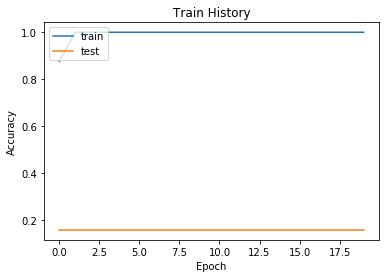

In [122]:
show_train_history('accuracy','val_accuracy')

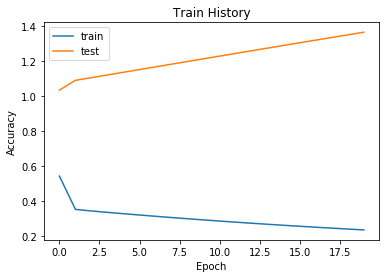

In [123]:
show_train_history('loss','val_loss')